#### In this exercise we are going to use Boston Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Boston.csv"
BostonData = pd.read_csv(url)
del BostonData['Unnamed: 0']
BostonData.head(5)
BostonData.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### let's first categorize medv to 4 groups. 
Lowest 20% medv is categorized as Level 1

next 30% medv is categorized as Level 2

next 30% medv is categorized as Level 3

Top 20% medv is categorized as Level 4


In [34]:
BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[mask_cat4,'medvCategory'] = '4'

#### Our goal is to predict medvCategory based on 'rm', 'ptratio' and 'lstat'

#### First standardize your input (X) variables - put standardized values in new variables 'rm_st' , 'ptraio_st' and 'lstat_st'

In [39]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

for x in ['rm', 'ptratio', 'lstat']:
    BostonData[x + "_st"] = Standardize(BostonData[x])

BostonData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medvCategory,rm_st,ptratio_st,lstat_st
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3,0.577505,0.287234,0.089680
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3,0.547998,0.553191,0.204470
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4,0.694386,0.553191,0.063466
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4,0.658555,0.648936,0.033389
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,4,0.687105,0.648936,0.099338


#### Run a KNN classifier with 5 nearest neighbors and report your misclassification error. set weights to uniform

In [40]:
from sklearn import neighbors, metrics
X = BostonData[['rm_st', 'ptratio_st', 'lstat_st']]
y = BostonData['medvCategory']
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X, y)
knn.score(X,y)
BostonData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medvCategory,rm_st,ptratio_st,lstat_st
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3,0.577505,0.287234,0.089680
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3,0.547998,0.553191,0.204470
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4,0.694386,0.553191,0.063466
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4,0.658555,0.648936,0.033389
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,4,0.687105,0.648936,0.099338


Is this error reliable?

Answer: We are unclear as we have only ran the algorithm against our training data.

#### Now use 10-fold cross-validation to choose the most efficient K (number of neighbors)

13
0.733176470588


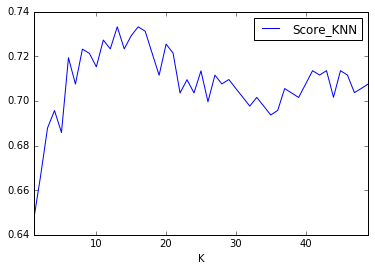

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation
kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle=True)
score_list = []
rangeK = range(1,50)
for k in rangeK:
    scores = []
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights='uniform')
    for train_index, test_index in kf:
        knn.fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(knn.score(X.iloc[test_index], y.iloc[test_index]))
    score_list.append(np.mean(scores))

Score_KNN_df = pd.DataFrame({'Score_KNN' : score_list, 'K' : rangeK})
Score_KNN_df.plot(x ='K', y='Score_KNN')
print score_list.index(max(score_list)) +1
print max(score_list)
        

 Explain your findings: It seems the optimal K tends to be in between about 13. 

#### Train your algorithm with the optimal K you found above (don't worry if it changes from time to time - if that is the case use the one that is usually the best). After training your model with that K, Use it to predict the class of a neighborhood with rm =2, lstat = 3.5 and ptratio of 19. 

In [72]:
# We shall standardize our input first!
knn = neighbors.KNeighborsClassifier(n_neighbors=13, weights='uniform')
y = BostonData['medvCategory']
knn.fit(X, y)
def Standardize_val(X, val):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (val-X_Min)/(X_Max - X_Min)
    return X_Standardized
rm = Standardize_val(BostonData['rm'], 2)
lstat = Standardize_val(BostonData['lstat'], 3.5)
ptratio = Standardize_val(BostonData['ptratio'], 19)
print knn.predict([rm, lstat, ptratio])

['2']


/Users/jcano/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Now let's run a KNN-regression model to predict MEDV of the same point

In [74]:
knn = neighbors.KNeighborsRegressor(n_neighbors=13, weights='uniform')
y = BostonData["medv"]
knn.fit(X, y)
def Standardize_val(X, val):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (val-X_Min)/(X_Max - X_Min)
    return X_Standardized
rm = Standardize_val(BostonData['rm'], 2)
lstat = Standardize_val(BostonData['lstat'], 3.5)
ptratio = Standardize_val(BostonData['ptratio'], 19)
knn.predict([rm, lstat, ptratio])

/Users/jcano/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 15.53076923])